In [13]:
import folium
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame

In [14]:
df: DataFrame = pd.read_csv('../../data/interim/3_geo_exploration.csv')
df.head()

lon0       lat0       lon1       lat1  passenger_count  year  month  \
0 -73.999817  40.738354 -73.999512  40.723217              1.0  2015      5   
1 -73.994355  40.728225 -73.994710  40.750325              1.0  2009      7   
2 -74.005043  40.740770 -73.962565  40.772647              1.0  2009      8   
3 -73.976124  40.790844 -73.965316  40.803349              3.0  2009      6   
4 -73.925023  40.744085 -73.973082  40.761247              5.0  2014      8   

   day  hour  weekday  distance  price_per_km  fare pickup_neighborhood  \
0    7    15        3  1.681111      4.461336   7.5        West Village   
1   17    16        4  2.454363      3.137270   7.7                NoHo   
2   24    17        0  5.039603      2.559726  12.9        West Village   
3   26     4        4  1.661442      3.190001   5.3     Upper West Side   
4   28    13        3  4.483730      3.568457  16.0           Sunnyside   

  dropoff_neighborhood  
0                 SoHo  
1              Chelsea  
2      Upper East Side  
3      Upper West Side  
4              Midtown

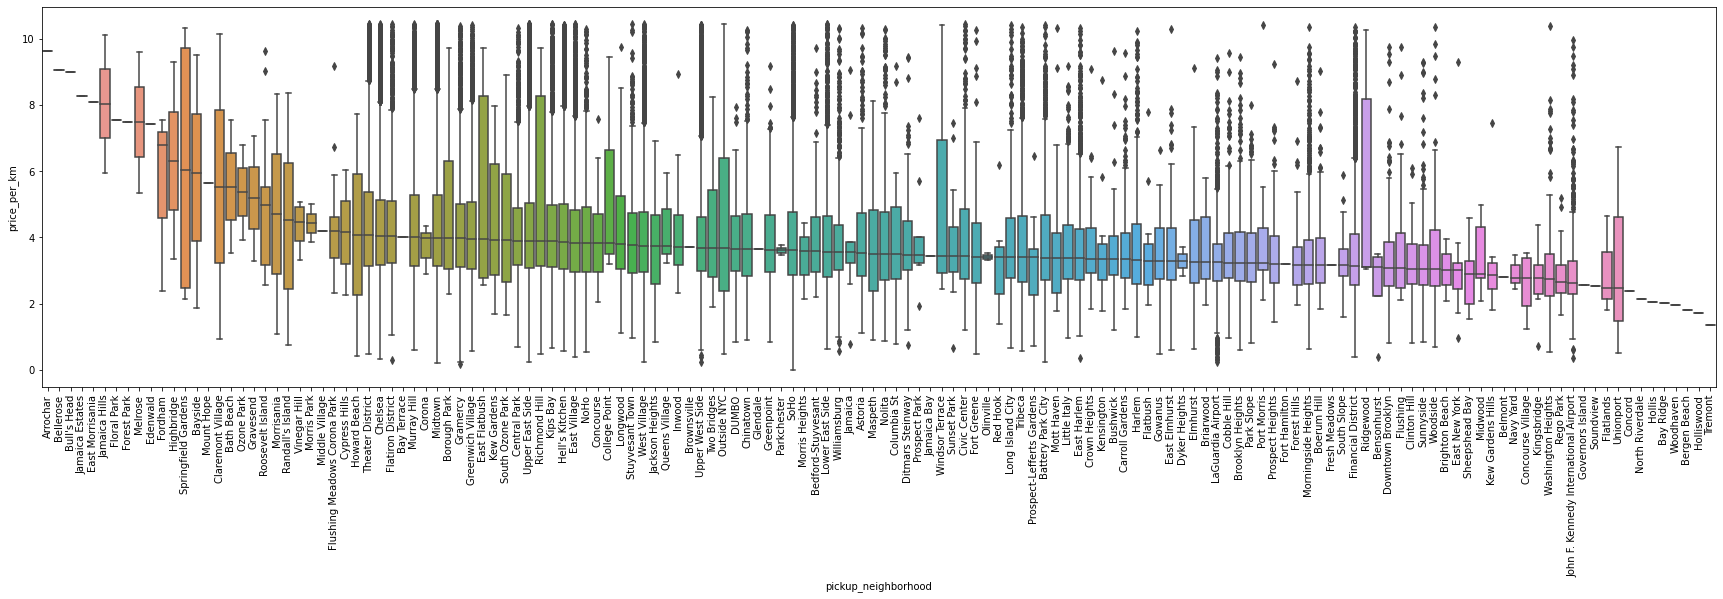

In [15]:
ordered_index = df.groupby(['pickup_neighborhood'])['price_per_km'].median().sort_values(ascending=False).index

fig = plt.subplots(figsize=(30, 7))

ax = sns.boxplot(x='pickup_neighborhood', y='price_per_km', data=df, order=ordered_index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

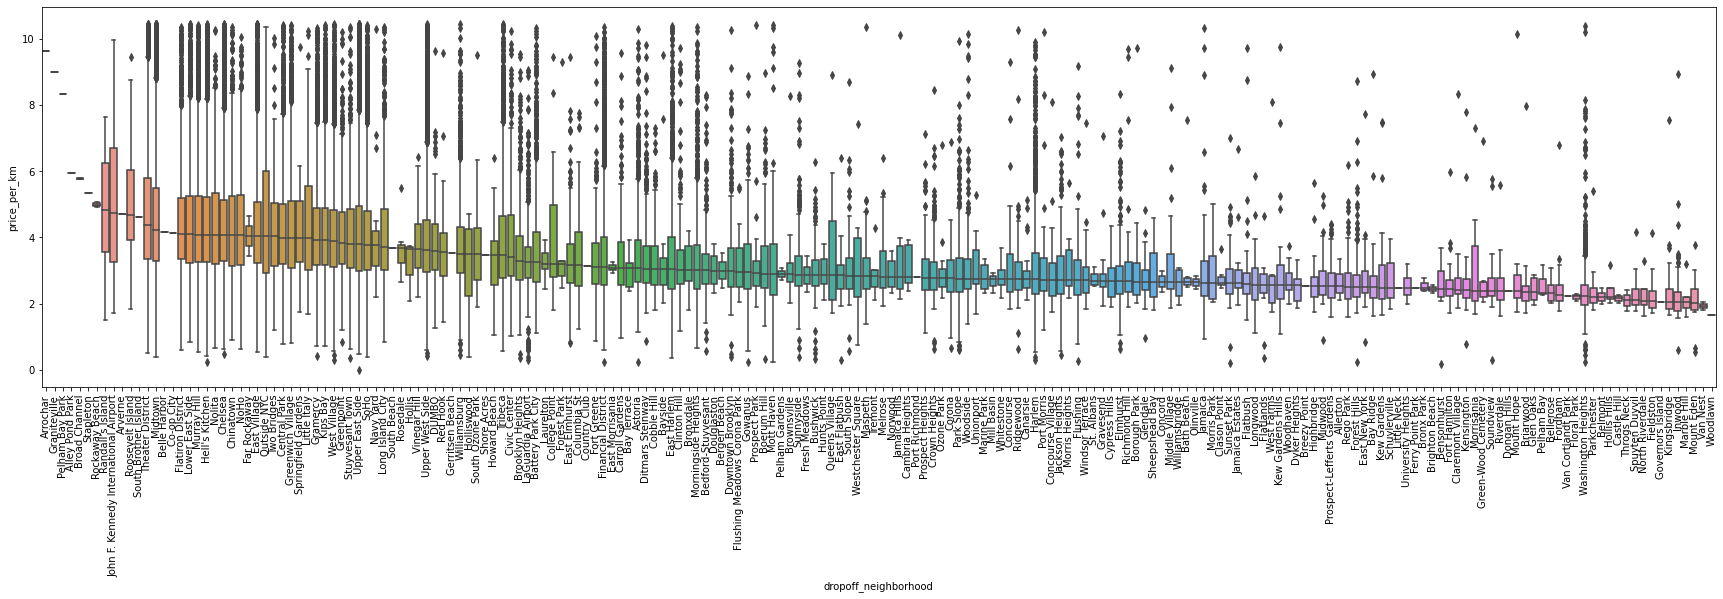

In [16]:
ordered_index = df.groupby(['dropoff_neighborhood'])['price_per_km'].median().sort_values(ascending=False).index

fig = plt.figure(figsize=(30, 7))

ax = sns.boxplot(x='dropoff_neighborhood', y='price_per_km', data=df, order=ordered_index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [17]:
geoJSON_df = gpd.read_file('../../data/external/nyc_neighborhoods.geo.json')
geoJSON_df.head()

neighborhood boroughCode        borough  \
0         Allerton           2          Bronx   
1  Alley Pond Park           4         Queens   
2    Arden Heights           5  Staten Island   
3        Arlington           5  Staten Island   
4         Arrochar           5  Staten Island   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  
0  POLYGON ((-73.84860 40.87167, -73.84582 40.870...  
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...  
2  POLYGON ((-74.16983 40.56108, -74.16982 40.561...  
3  POLYGON ((-74.15975 40.64142, -74.15998 40.641...  
4  POLYGON ((-74.06078 40.59319, -74.06079 40.593...

In [18]:
m = folium.Map(
    location=[40.73835372924805, -73.99981689453125
              ],
    tiles="cartodbpositron",
    zoom_start=12,
)

choropleth_df = geoJSON_df.join(df.groupby(['pickup_neighborhood'])['price_per_km'].mean().to_frame(), on='neighborhood')

choropleth = folium.Choropleth(
    geo_data=choropleth_df,
    name="choropleth",
    data=choropleth_df,
    columns=["neighborhood", "price_per_km"],
    key_on="feature.properties.neighborhood",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Pickup price/km ($)",
    bins=np.arange(0,11,2)
)
folium.GeoJsonPopup(["neighborhood", "price_per_km"]).add_to(choropleth.geojson)

choropleth.add_to(m)
folium.LayerControl().add_to(m)

m

In [19]:
m = folium.Map(
    location=[40.73835372924805, -73.99981689453125
              ],
    tiles="cartodbpositron",
    zoom_start=12,
)

choropleth_df = geoJSON_df.join(df.groupby(['dropoff_neighborhood'])['price_per_km'].mean().to_frame(), on='neighborhood')

choropleth = folium.Choropleth(
    geo_data=choropleth_df,
    name="choropleth",
    data=choropleth_df,
    columns=["neighborhood", "price_per_km"],
    key_on="feature.properties.neighborhood",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Pickup price/km ($)",
    bins=np.arange(0,11,2)
)
folium.GeoJsonPopup(["neighborhood", "price_per_km"]).add_to(choropleth.geojson)

choropleth.add_to(m)
folium.LayerControl().add_to(m)

m

In [20]:
m = folium.Map(
    location=[40.73835372924805, -73.99981689453125
              ],
    tiles="cartodbpositron",
    zoom_start=12,
)

choropleth_df = geoJSON_df.join(df.groupby(['pickup_neighborhood'])['price_per_km'].count().to_frame(), on='neighborhood')

choropleth = folium.Choropleth(
    geo_data=choropleth_df,
    name="choropleth",
    data=choropleth_df,
    columns=["neighborhood", "price_per_km"],
    key_on="feature.properties.neighborhood",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Pickup counts",
    bins=10 ** np.arange(6)
)
folium.GeoJsonPopup(["neighborhood", "price_per_km"]).add_to(choropleth.geojson)

choropleth.add_to(m)
folium.LayerControl().add_to(m)

m

In [21]:
geoJSON_df.join(df.groupby(['pickup_neighborhood'])['price_per_km'].mean().to_frame(), on='neighborhood')

neighborhood boroughCode        borough  \
0           Allerton           2          Bronx   
1    Alley Pond Park           4         Queens   
2      Arden Heights           5  Staten Island   
3          Arlington           5  Staten Island   
4           Arrochar           5  Staten Island   
..               ...         ...            ...   
305  Windsor Terrace           3       Brooklyn   
306        Woodhaven           4         Queens   
307         Woodlawn           2          Bronx   
308          Woodrow           5  Staten Island   
309         Woodside           4         Queens   

                                                   @id  \
0    http://nyc.pediacities.com/Resource/Neighborho...   
1    http://nyc.pediacities.com/Resource/Neighborho...   
2    http://nyc.pediacities.com/Resource/Neighborho...   
3    http://nyc.pediacities.com/Resource/Neighborho...   
4    http://nyc.pediacities.com/Resource/Neighborho...   
..                                                 ...   
305  http://nyc.pediacities.com/Resource/Neighborho...   
306  http://nyc.pediacities.com/Resource/Neighborho...   
307  http://nyc.pediacities.com/Resource/Neighborho...   
308  http://nyc.pediacities.com/Resource/Neighborho...   
309  http://nyc.pediacities.com/Resource/Neighborho...   

                                              geometry  price_per_km  
0    POLYGON ((-73.84860 40.87167, -73.84582 40.870...           NaN  
1    POLYGON ((-73.74333 40.73888, -73.74371 40.739...           NaN  
2    POLYGON ((-74.16983 40.56108, -74.16982 40.561...           NaN  
3    POLYGON ((-74.15975 40.64142, -74.15998 40.641...           NaN  
4    POLYGON ((-74.06078 40.59319, -74.06079 40.593...      9.628842  
..                                                 ...           ...  
305  POLYGON ((-73.98006 40.66075, -73.97988 40.660...      5.430224  
306  POLYGON ((-73.86233 40.69596, -73.85654 40.697...      1.947814  
307  POLYGON ((-73.85947 40.90052, -73.85926 40.900...           NaN  
308  POLYGON ((-74.17728 40.54063, -74.17723 40.539...           NaN  
309  POLYGON ((-73.90087 40.75767, -73.90014 40.756...      3.632188  

[310 rows x 6 columns]